In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
%%time
dataset = pd.read_csv("data_seawulf.csv")
dataset.columns = ((dataset.columns.str).replace("^ ","")).str.replace(" $","")
dataset

CPU times: user 213 ms, sys: 36.4 ms, total: 249 ms
Wall time: 250 ms


,Kernel,Architechture,Vendor,CPUs,Cycle,L1,L2,L3,RAM),Threads,...,addInt,addFloat,mulInt,mulFloat,assignInt,assignFloat,addAssignInt,addAssignFloat,postIncInt,Time
0,kernel_100_100_1_5_9_0,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,0,0,0,0,0,0,0,1,0.001
1,kernel_100_100_1_5_9_1,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,200,0,0,0,300,0,0,0,101,0.001
2,kernel_100_100_1_5_9_2,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,0,603,0,703,0,0,0,101,0.001
3,kernel_100_100_1_5_9_3,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,200,0,603,0,1003,0,0,0,201,0.001
4,kernel_100_100_1_5_9_4,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,0,0,0,100,0,1007,0,101,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138363,kernel_600_600_1_5_9_123,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,1200,1200,3603,3603,8403,4803,0,6007,4801,0.057
138364,kernel_600_600_1_5_9_124,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,1200,0,3603,3000,4803,6007,6007,4201,0.061
138365,kernel_600_600_1_5_9_125,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,1200,1200,0,3603,4800,4803,6007,6007,4801,0.061
138366,kernel_600_600_1_5_9_126,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,1200,3603,3603,7203,4803,6007,6007,4801,0.065


In [39]:
%%time
scaled_features = dataset.copy()
# col_names = ['CPUs','Cycle','L1','L2','L3','RAM)','Threads','Iterations','varDecl','refExpr','intLiteral','floatLiteral','addInt','addFloat','mulInt','mulFloat','assignInt','assignFloat','addAssignInt','addAssignFloat','postIncInt','Time']
col_names = ['CPUs','Cycle','L1','L2','L3','RAM)','Threads','Iterations','varDecl','refExpr','intLiteral','floatLiteral','addInt','addFloat','mulInt','mulFloat','assignInt','assignFloat','addAssignInt','addAssignFloat','postIncInt']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
#scaled_features
x=scaled_features.iloc[:,3:24].values
y=scaled_features.iloc[:,24:].values
# st_x = StandardScaler()
# st_y = StandardScaler()
# X = st_x.fit_transform(x)
# Y = st_y.fit_transform(y)

CPU times: user 308 ms, sys: 26 ms, total: 334 ms
Wall time: 432 ms


In [5]:
%%time
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(x,y.flatten())

CPU times: user 16min 6s, sys: 6.16 s, total: 16min 12s
Wall time: 16min 15s


SVR()

In [6]:
%%time
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(x,y.flatten())

CPU times: user 12min 23s, sys: 2.74 s, total: 12min 26s
Wall time: 12min 27s


SVR(kernel='linear')

In [7]:
%%time
regressor_poly = SVR(kernel='poly')
regressor_poly.fit(x,y.flatten())

CPU times: user 2h 1min 15s, sys: 22.8 s, total: 2h 1min 37s
Wall time: 2h 6min 15s


SVR(kernel='poly')

In [8]:
%%time
prediction_rbf = regressor_rbf.predict(x)

CPU times: user 1min 42s, sys: 299 ms, total: 1min 42s
Wall time: 1min 42s


In [9]:
%%time
prediction_linear = regressor_linear.predict(x)

CPU times: user 3min 4s, sys: 243 ms, total: 3min 5s
Wall time: 3min 5s


In [10]:
%%time
prediction_poly = regressor_poly.predict(x)

CPU times: user 1min 18s, sys: 95.5 ms, total: 1min 18s
Wall time: 1min 18s


In [11]:
# plt.scatter(transformed,Y.flatten())
# plt.scatter(transformed, prediction_rbf, color='cyan')
# plt.scatter(transformed, prediction_linear, color='red')
# plt.scatter(transformed, prediction_poly, color='yellow')

In [12]:
# mse_rbf=mean_squared_error(Y, prediction_rbf)
# rmse_rbf=np.sqrt(mse_rbf)
# mse_linear=mean_squared_error(Y, prediction_linear)
# rmse_linear=np.sqrt(mse_linear)
# mse_poly=mean_squared_error(Y, prediction_poly)
# rmse_poly=np.sqrt(mse_poly)
# print(f'rbf = {rmse_rbf}, linear = {rmse_linear}, poly = {rmse_poly}')

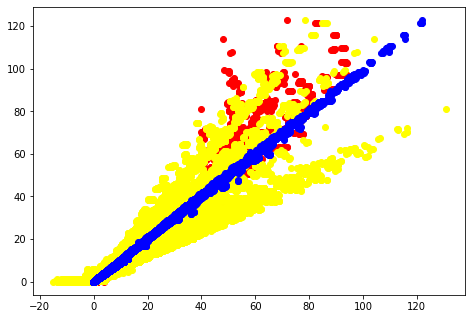

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(prediction_rbf,y, color='red')
ax.scatter(prediction_linear,y, color='yellow')
ax.scatter(prediction_poly,y, color='blue')

In [63]:
mse_rbf=mean_squared_error(y, prediction_rbf)
rmse_rbf=np.sqrt(mse_rbf)
mse_linear=mean_squared_error(y, prediction_linear)
rmse_linear=np.sqrt(mse_linear)
mse_poly=mean_squared_error(y, prediction_poly)
rmse_poly=np.sqrt(mse_poly)
print(f'rbf = {rmse_rbf}, linear = {rmse_linear}, poly = {rmse_poly}')

rbf = 1.4624571406338756, linear = 4.648080339587879, poly = 0.22198870455926456


In [64]:
%%time
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x,y)
prediction_linReg = reg.predict(x)
mse_linReg=mean_squared_error(y, prediction_linReg)
rmse_linReg=np.sqrt(mse_linReg)
rmse_linReg

CPU times: user 128 ms, sys: 76.7 ms, total: 205 ms
Wall time: 123 ms


4.4674964069567995